In [5]:
!pip install git+https://github.com/Bots-Avatar/ExplainitAll -q

In [2]:
import gensim
from inseq import load_model
from explainitall.gpt_like_interp.downloader import DownloadManager
from explainitall.gpt_like_interp import interp
from explainitall.gui.interface import set_verbosity_error
set_verbosity_error()

In [3]:
def load_nlp_model(nlp_model_url):
    nlp_model_path = DownloadManager.load_zip(nlp_model_url)
    return gensim.models.KeyedVectors.load_word2vec_format(nlp_model_path, binary=True)

# 'ID': 180
# 'Размер вектора': 300
# 'Корпус': 'Russian National Corpus'
# 'Размер словаря': 189193
# 'Алгоритм': 'Gensim Continuous Bag-of-Words'
# 'Лемматизация': True

nlp_model = load_nlp_model ('http://vectors.nlpl.eu/repository/20/180.zip')

Downloading: /root/.cache/180_zip: 100%|██████████| 462M/462M [01:02<00:00, 7.78MiB/s]  
Extracting: /root/.cache/180_zip_data: 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


In [4]:
def load_gpt_model(gpt_model_name):
    return load_model(model=gpt_model_name,
                           attribution_method="integrated_gradients")

# 'Фреймворк': 'transformers'
# 'Тренировочные токены': '80 млрд'
# 'Размер контекста': 2048

gpt_model = load_gpt_model("ai-forever/rugpt3small_based_on_gpt2")

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/551M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

In [5]:
clusters_discr = [
    {'name': 'Животные', 'centroid': ['собака', 'кошка', 'заяц'], 'top_k': 140},
    {'name': 'Лекарства', 'centroid': ['уколы', 'таблетки', 'противовирусное'], 'top_k': 160},
    {'name': 'Болезни', 'centroid': ['простуда', 'орви', 'орз', 'грипп'], 'top_k': 20},
    {'name': 'Симптомы', 'centroid': ['температура', 'насморк'], 'top_k': 20}
]

explainer = interp.ExplainerGPT2(gpt_model=gpt_model, nlp_model=nlp_model)


expl_data = explainer.interpret(
    input_texts='я думаю что у моей кошки простуда, у нее температура, постоянный кашель: чем мне лечить мою кошку? ответ:',
    generated_texts='На сегодняшний день существует специальное противовирусное лечение для кошек, так же можно применять антибиотики',
    clusters_description=clusters_discr,
    batch_size=100,
    steps=14,
)

Attributing with integrated_gradients...: 100%|██████████| 43/43 [00:01<00:00, 11.01it/s]


In [6]:
# ==============слова==============

In [7]:
# Карта важности слов
expl_data.word_imp_df

,Tokens,На,сегодняшний,день,существует,специальное,противовирусное,лечение,для,кошек,,так,же,можно,применять,антибиотики
0,я,0.040555,0.056404,0.043779,0.035426,0.033671,0.046261,0.026546,0.027503,0.030530,0.025709,0.032060,0.030966,0.032397,0.031446,0.026451
1,думаю,0.028215,0.035409,0.024275,0.025443,0.020536,0.023112,0.013747,0.013515,0.019542,0.018513,0.028633,0.031981,0.031477,0.016247,0.014616
2,что,0.020971,0.020856,0.020365,0.015501,0.015042,0.021849,0.013292,0.010450,0.018544,0.014000,0.018326,0.030758,0.023284,0.012470,0.022168
3,у,0.016417,0.018083,0.014663,0.011473,0.010523,0.021000,0.008607,0.008195,0.015986,0.011157,0.010420,0.009571,0.011356,0.008225,0.013459
4,моей,0.025859,0.032813,0.023847,0.023659,0.018824,0.028457,0.012557,0.014643,0.025287,0.012721,0.015889,0.015285,0.018388,0.011960,0.013622
5,кошки,0.026186,0.045362,0.023673,0.026911,0.023132,0.079771,0.020313,0.028612,0.092125,0.020123,0.021062,0.017138,0.018490,0.024620,0.028242
6,простуда,0.028066,0.028443,0.024126,0.017523,0.017404,0.078104,0.013685,0.018939,0.020337,0.017521,0.014864,0.016514,0.017167,0.020109,0.022618
7,,0.019019,0.015317,0.019047,0.013244,0.017981,0.024356,0.012912,0.012768,0.011589,0.026388,0.011134,0.030270,0.017015,0.013203,0.025444
8,у,0.021077,0.018937,0.015088,0.012104,0.012505,0.010644,0.008756,0.008287,0.007910,0.017830,0.011632,0.022861,0.012323,0.009358,0.017899
9,нее,0.023424,0.026871,0.023035,0.019682,0.015655,0.014607,0.010801,0.012153,0.009644,0.012432,0.013190,0.017876,0.017315,0.013007,0.013943


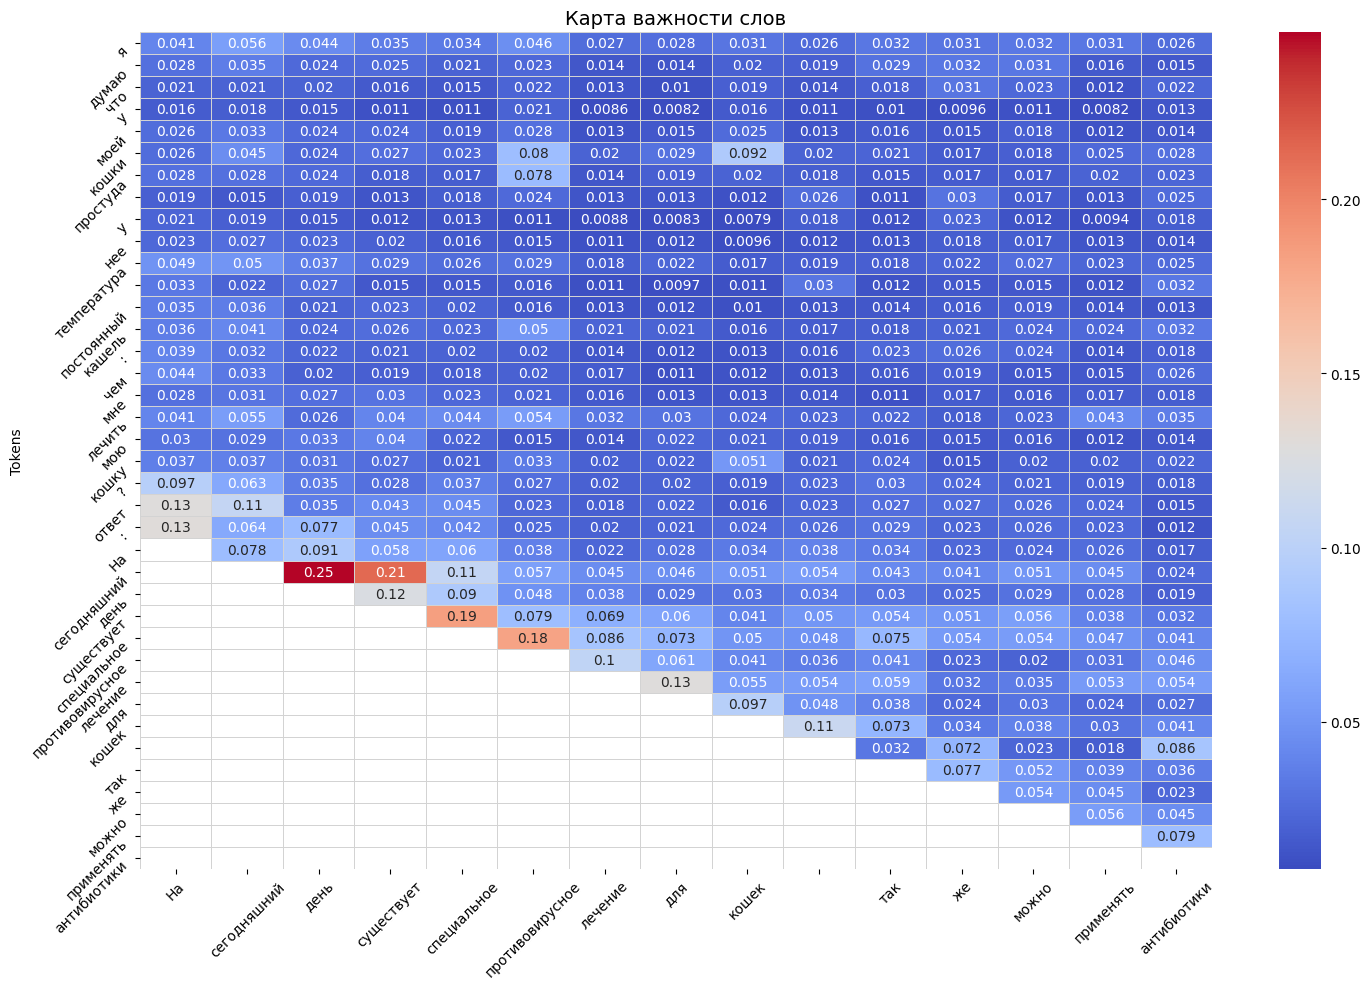

In [8]:
# Тепловая карта важности слов
expl_data.show_word_imp_heatmap()

In [9]:
# Карта важности слов, нормированная
expl_data.word_imp_norm_df


,Tokens,На,сегодняшний,день,существует,специальное,противовирусное,лечение,для,кошек,,так,же,можно,применять,антибиотики
0,я,0.797614,0.902209,0.821349,0.756599,0.739015,0.839263,0.602458,0.629676,0.695625,0.576022,0.719213,0.702901,0.723724,0.710384,0.599599
1,думаю,0.647838,0.756445,0.525312,0.567132,0.370204,0.479793,0.117357,0.111364,0.327075,0.283359,0.657701,0.718123,0.710857,0.195088,0.141687
2,что,0.389147,0.384154,0.362789,0.169464,0.154686,0.427068,0.105799,0.051323,0.284683,0.124145,0.275610,0.699489,0.486728,0.086998,0.440631
3,у,0.201181,0.265636,0.143087,0.067596,0.052378,0.390416,0.030081,0.026531,0.185879,0.062182,0.050894,0.040006,0.065541,0.026780,0.109955
4,моей,0.580959,0.729018,0.508975,0.501649,0.296418,0.653626,0.088861,0.142482,0.561804,0.092450,0.182532,0.162395,0.278184,0.076607,0.114101
5,кошки,0.591410,0.832822,0.502206,0.613220,0.480623,0.956048,0.360499,0.657223,0.963059,0.352249,0.393125,0.228113,0.282416,0.538120,0.648484
6,простуда,0.644186,0.653291,0.519697,0.243146,0.238460,0.954765,0.115730,0.301291,0.361569,0.243054,0.149151,0.204734,0.229248,0.351657,0.459508
7,,0.304674,0.163433,0.305851,0.104625,0.261463,0.528370,0.096772,0.093514,0.069651,0.597675,0.061807,0.691041,0.223412,0.103656,0.567183
8,у,0.393748,0.301199,0.156113,0.079441,0.087740,0.054139,0.031455,0.027292,0.024300,0.255385,0.070443,0.469542,0.083897,0.037602,0.258146
9,нее,0.492365,0.612068,0.476676,0.333106,0.174592,0.141419,0.056511,0.080412,0.040869,0.086184,0.103324,0.257231,0.234961,0.098994,0.122594


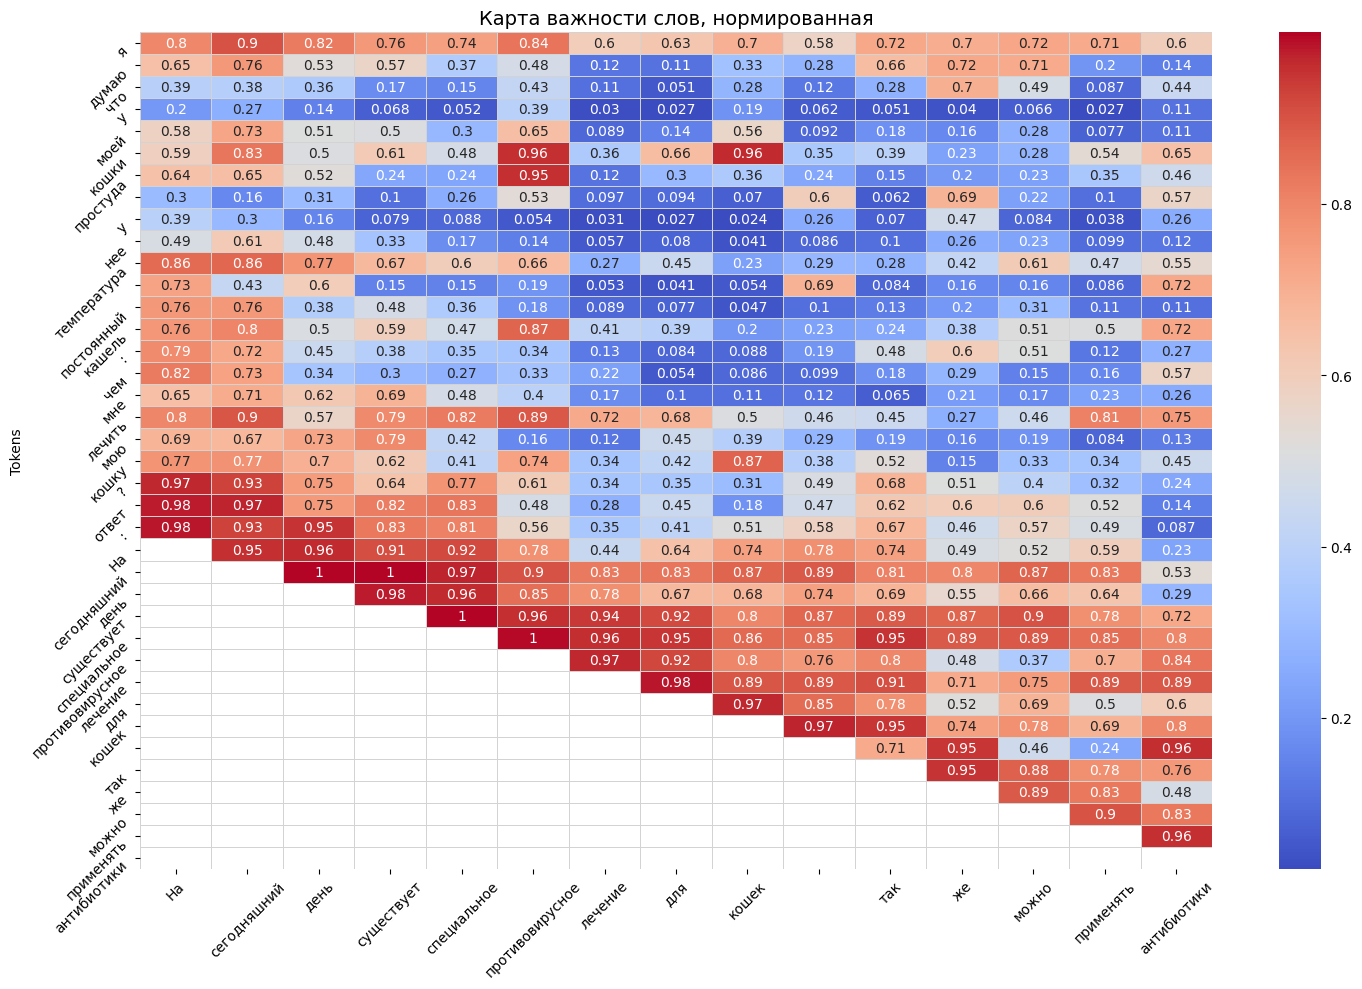

In [10]:
# Тепловая карта важности слов, нормированная
expl_data.show_word_imp_norm_heatmap()

In [11]:
# ==============кластеры==============

In [12]:
# Карта важности кластеров
expl_data.cluster_imp_df

,Tokens,unnamed,unnamed,unnamed,unnamed,unnamed,unnamed,unnamed,unnamed,Животные,unnamed,unnamed,unnamed,unnamed,unnamed,Лекарства
0,unnamed,0.797614,0.902209,0.821349,0.756599,0.739015,0.839263,0.602458,0.629676,0.695625,0.576022,0.719213,0.702901,0.723724,0.710384,0.599599
1,unnamed,0.647838,0.756445,0.525312,0.567132,0.370204,0.479793,0.117357,0.111364,0.327075,0.283359,0.657701,0.718123,0.710857,0.195088,0.141687
2,unnamed,0.389147,0.384154,0.362789,0.169464,0.154686,0.427068,0.105799,0.051323,0.284683,0.124145,0.275610,0.699489,0.486728,0.086998,0.440631
3,unnamed,0.201181,0.265636,0.143087,0.067596,0.052378,0.390416,0.030081,0.026531,0.185879,0.062182,0.050894,0.040006,0.065541,0.026780,0.109955
4,unnamed,0.580959,0.729018,0.508975,0.501649,0.296418,0.653626,0.088861,0.142482,0.561804,0.092450,0.182532,0.162395,0.278184,0.076607,0.114101
5,Животные,0.591410,0.832822,0.502206,0.613220,0.480623,0.956048,0.360499,0.657223,0.963059,0.352249,0.393125,0.228113,0.282416,0.538120,0.648484
6,Болезни,0.644186,0.653291,0.519697,0.243146,0.238460,0.954765,0.115730,0.301291,0.361569,0.243054,0.149151,0.204734,0.229248,0.351657,0.459508
7,unnamed,0.304674,0.163433,0.305851,0.104625,0.261463,0.528370,0.096772,0.093514,0.069651,0.597675,0.061807,0.691041,0.223412,0.103656,0.567183
8,unnamed,0.393748,0.301199,0.156113,0.079441,0.087740,0.054139,0.031455,0.027292,0.024300,0.255385,0.070443,0.469542,0.083897,0.037602,0.258146
9,unnamed,0.492365,0.612068,0.476676,0.333106,0.174592,0.141419,0.056511,0.080412,0.040869,0.086184,0.103324,0.257231,0.234961,0.098994,0.122594


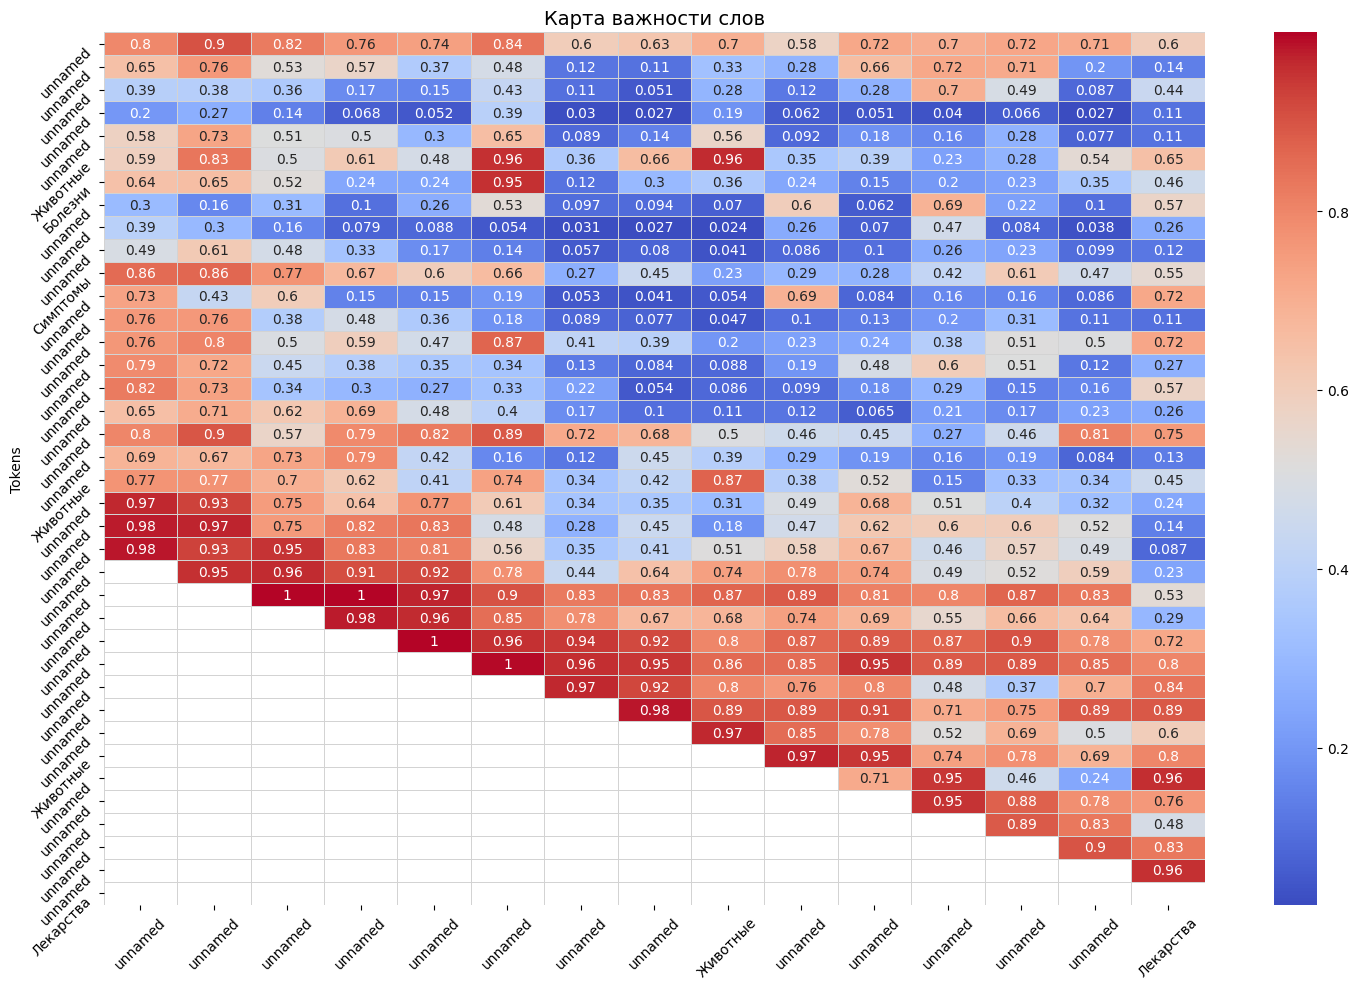

In [13]:
# Тепловая карта важности кластеров
expl_data.show_cluster_imp_heatmap()

In [14]:
# Карта важности кластеров, группированная
print(expl_data.cluster_imp_aggr_df)

      Tokens  Животные  Лекарства
0    Болезни  0.361569   0.459508
1   Животные  0.918520   0.633250
2  Лекарства       NaN        NaN
3   Симптомы  0.226119   0.545640


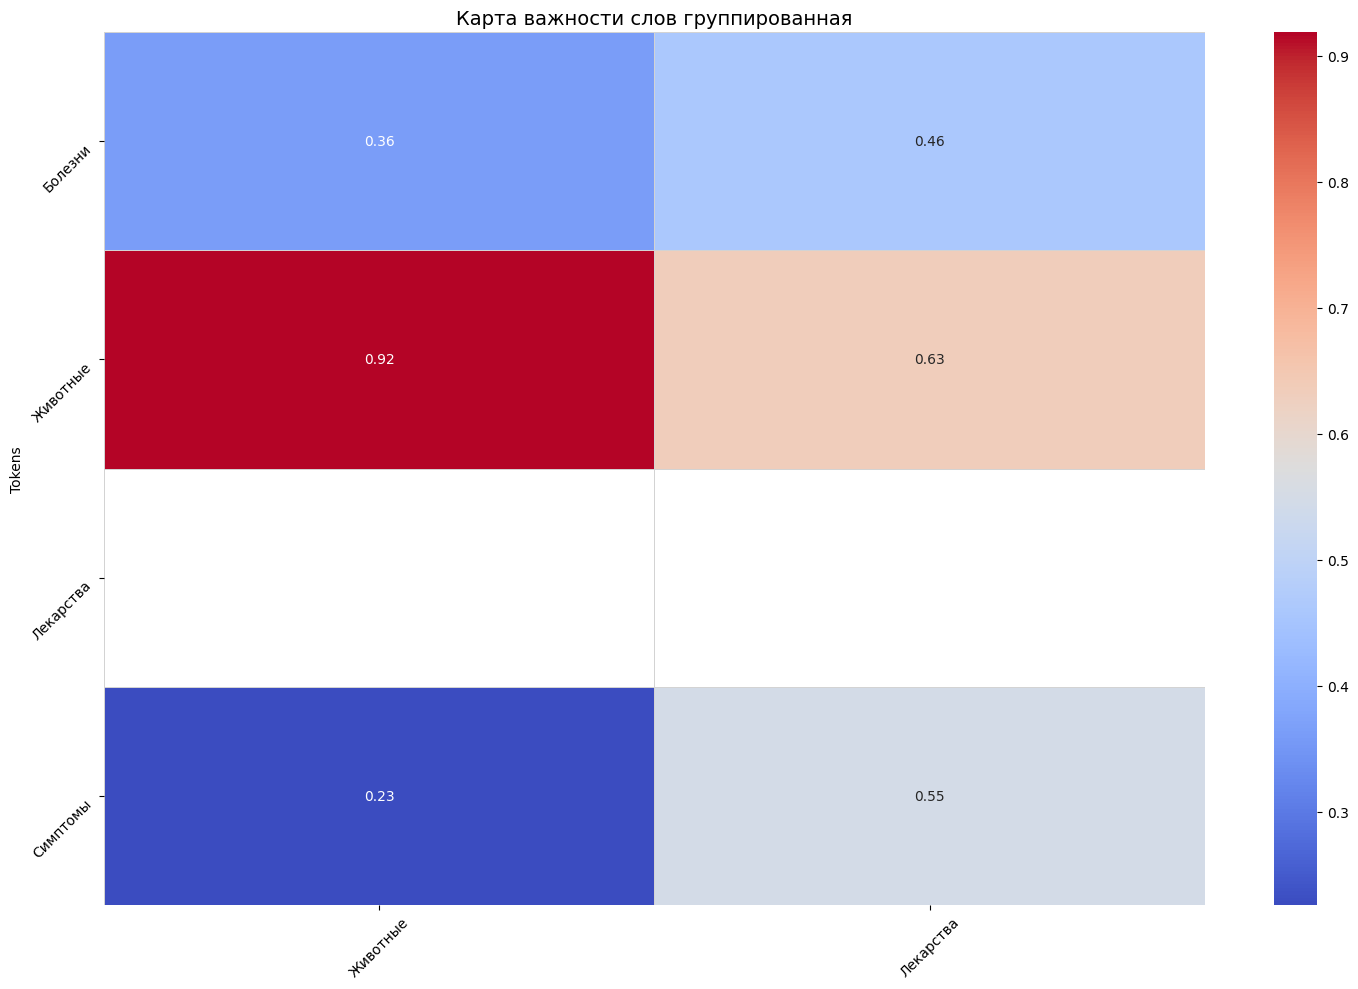

In [15]:
# Тепловая карта важности кластеров, группированная
expl_data.show_cluster_imp_aggr_heatmap()